In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "/Users/omerfaruk/MachineLearning/input"]).decode("utf8"))

column_2C_weka.csv



In [10]:
# read csv (comma separated value) into data
data = pd.read_csv('/Users/omerfaruk/MachineLearning/input/column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [11]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [13]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


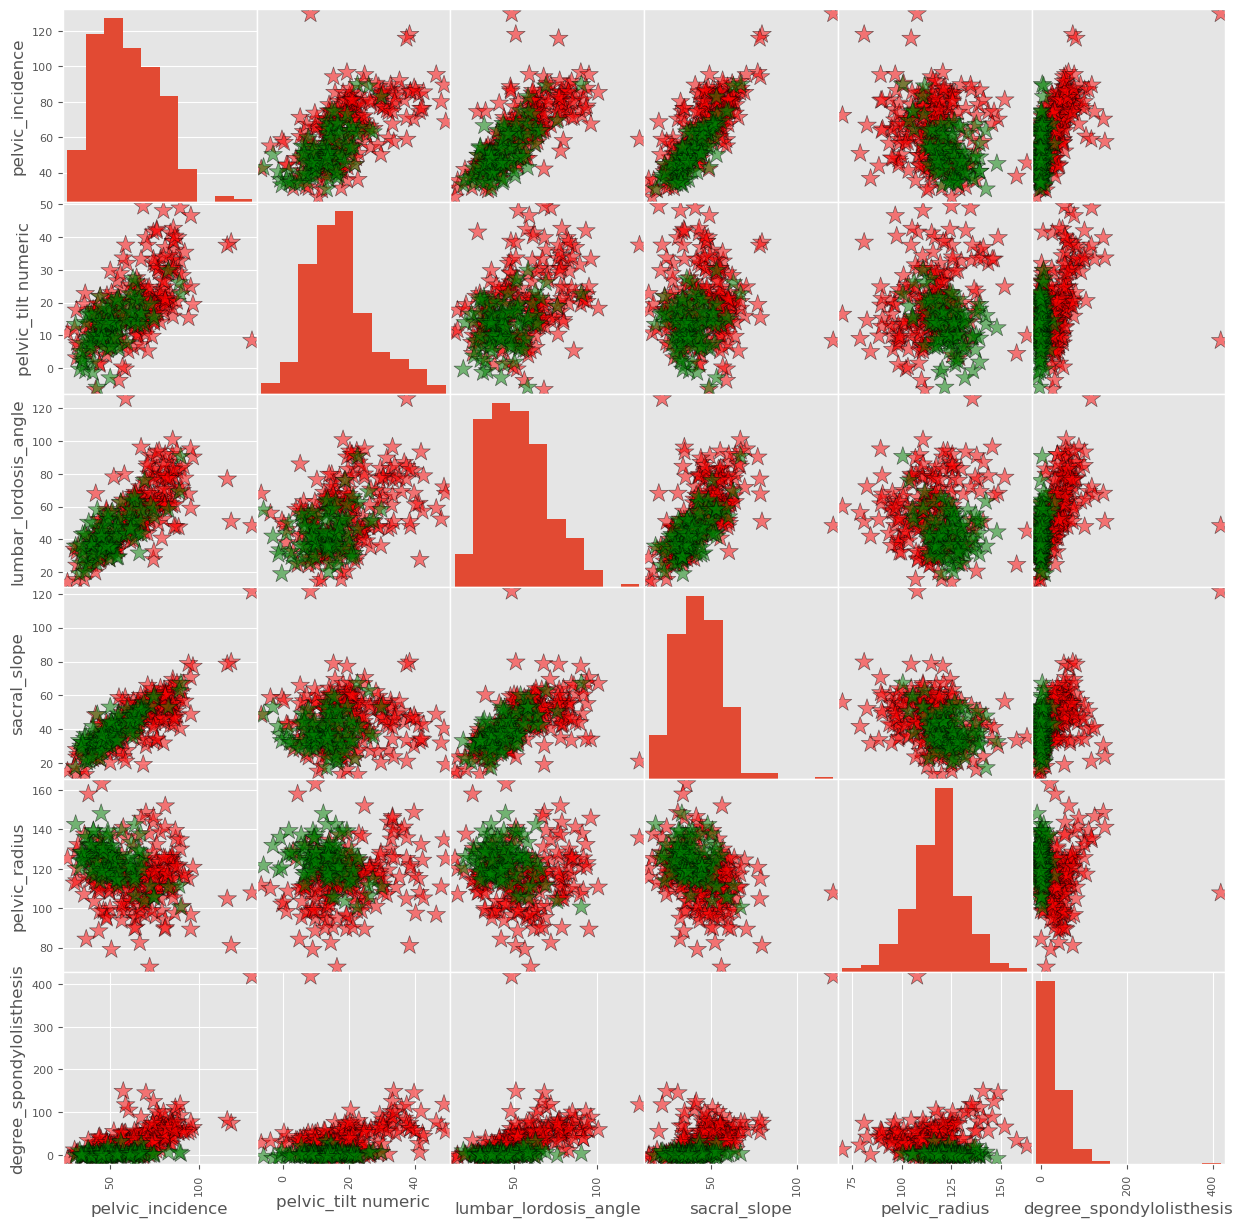

In [21]:
color_list = ['red' if i == 'Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c = color_list,
                                       figsize=[15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s= 200,
                                       marker='*',
                                       edgecolor='black')
plt.show()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

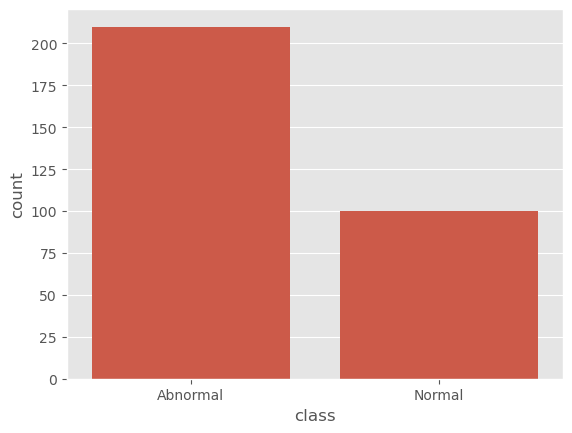

In [24]:
sns.countplot(x='class', data=data)
data.loc[:,'class'].value_counts()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
x, y = data.loc[:, data.columns != 'class'], data.loc[:,'class'] 
print(x.head())
print(y.head())


   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259  
2     105.985135                 -3.530317  
3     101.868495                 11.211523  
4     108.168725                  7.918501  


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ', knn.score(x_test, y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


### if K is too small -> more complex model -> overfitting : model is too good with train set but bad at new sets ###
### if K is too big -> less complex model -> underfitting : model needs more training ### 

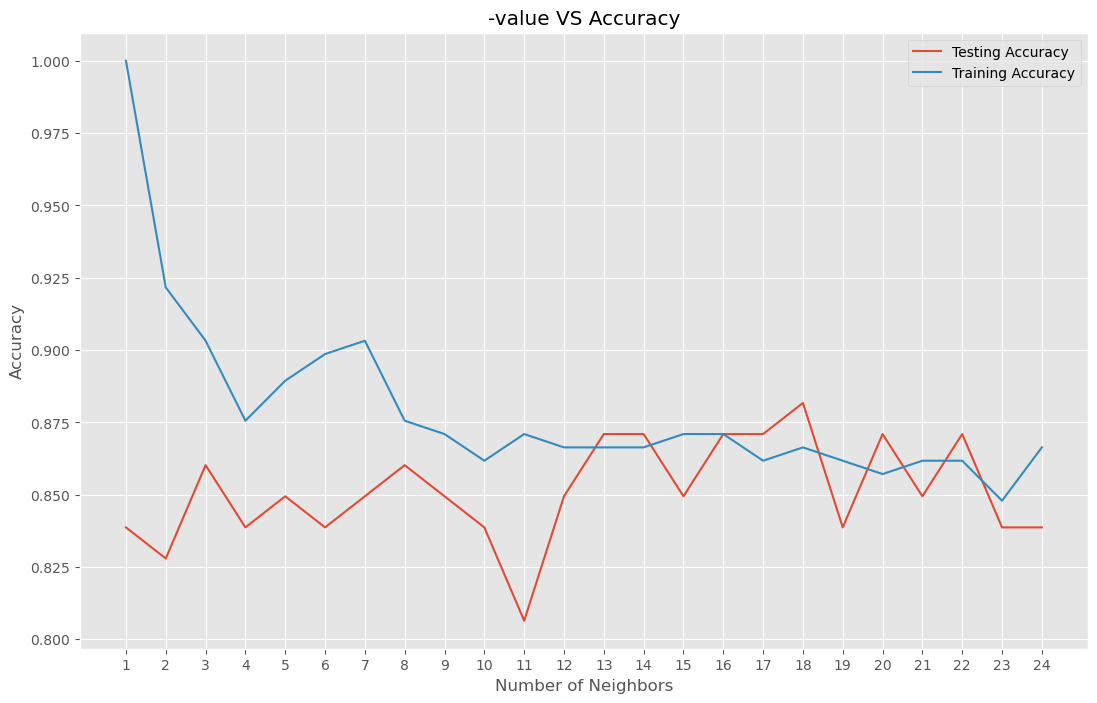

Best accuracy is 0.8817204301075269 with K = 18


In [33]:
# Model complexity
neig = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    # k from 1 to 25
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label= 'Testing Accuracy')
plt.plot(neig, train_accuracy, label= 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))